# Predicting Recipe Cuisine — End-to-End Data Science Project

## Business Understanding
The goal of this project is to **predict the cuisine** of a recipe based solely on its ingredients. This can help automate categorization on recipe websites, improve recommendation systems, and understand ingredient patterns.

##  Data Collection

A researcher named Yong-Yeol Ahn scraped tens of thousands of food recipes (cuisines and ingredients) from three different websites, namely: AllRecipes, Epicurious, and Menupan. Each recipe is labeled with its cuisine type and ingredient presence.

In [11]:
import pandas as pd

In [12]:
# Reading the data from the IBM server
recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")
print("Data read into DataFrame")

Data read into DataFrame


## Data Understanding

In [14]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [15]:
recipes.shape

(57691, 384)

So our dataset consists of 57,691 recipes. Each row represents a recipe, and for each recipe, the corresponding cuisine is documented as well as whether 384 ingredients exist in the recipe or not, beginning with almond and ending with zucchini.

We know that a basic sushi recipe includes the ingredients:
* rice
* soy sauce
* wasabi
* some fish/vegetables

In [18]:
# Lets check if these ingredients exists in our datframe
ingredients = list(recipes.columns.values)
print([ingredient for ingredient in ingredients if "rice" in ingredient])
print([ingredient for ingredient in ingredients if "soy" in ingredient])
print([ingredient for ingredient in ingredients if "wasabi" in ingredient])

['brown_rice', 'licorice', 'rice']
['soy_sauce', 'soybean', 'soybean_oil']
['wasabi']


Yes, they do. So maybe if a recipe contains all three ingredients: rice, wasabi, and soy_sauce, then we can confidently say that the recipe is a **Japanese** cuisine

## Data Preparation

In [21]:
recipes["country"].value_counts()

country
American        40150
Mexico           1754
Italian          1715
Italy            1461
Asian            1176
                ...  
Indonesia          12
Belgium            11
East-African       11
Israel              9
Bangladesh          4
Name: count, Length: 69, dtype: int64

In [22]:
recipes["country"].unique()

array(['Vietnamese', 'Indian', 'Spanish_Portuguese', 'Jewish', 'French',
       'Central_SouthAmerican', 'Cajun_Creole', 'Thai', 'Scandinavian',
       'Greek', 'American', 'African', 'MiddleEastern',
       'EasternEuropean_Russian', 'Italian', 'Irish', 'Mexican',
       'Chinese', 'German', 'Mediterranean', 'Japanese', 'Moroccan',
       'Southern_SoulFood', 'English_Scottish', 'Asian', 'Southwestern',
       'chinese', 'mexico', 'japanese', 'east_asian', 'asian', 'western',
       'korean', 'italian', 'Canada', 'Turkey', 'Caribbean', 'Bangladesh',
       'India', 'France', 'Italy', 'Israel', 'Korea', 'Iran',
       'Eastern-Europe', 'South-African', 'UK-and-Ireland', 'China',
       'Belgium', 'Germany', 'South-America', 'Spain', 'Netherlands',
       'Scandinavia', 'Philippines', 'Indonesia', 'East-African',
       'Vietnam', 'Thailand', 'Switzerland', 'West-African',
       'North-African', 'Pakistan', 'Portugal', 'Mexico', 'Lebanon',
       'Malaysia', 'Austria', 'Japan'], dtype=

By looking at the above table, we can make the following observations:

1. Cuisine column is labeled as Country, which is inaccurate.
2. Cuisine names are not consistent as not all of them start with an uppercase first letter.
3. Some cuisines are duplicated as variation of the country name (such as Vietnam and Vietnamese, Japan and Japanese).
4. Some cuisines have very few recipes.


Let's fix these problems

In [25]:
# Changing the column name to cuisine
recipes.rename(columns = {"country" : "cuisine"}, inplace = True)

In [26]:
# Make all the cuisine names lowercase
recipes["cuisine"] = recipes["cuisine"].str.lower()

In [27]:
# Make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [28]:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_to_keep = recipes_counts[recipes_counts > 50].index.tolist()

recipes = recipes[recipes["cuisine"].isin(cuisines_to_keep)]

In [29]:
recipes = recipes.replace("Yes", 1)
recipes = recipes.replace("No", 0)

/var/folders/tv/65fm8gl968v8bvb1dnkdxjsw0000gn/T/ipykernel_3476/1490361766.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  recipes = recipes.replace("No", 0)


In [30]:
check_recipes = recipes.loc[
    (recipes["rice"] == 1) &
    (recipes["soy_sauce"] == 1) &
    (recipes["wasabi"] == 1) &
    (recipes["seaweed"] == 1)
]

check_recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
11306,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11321,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11361,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12171,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12385,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13010,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13159,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13513,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13586,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13625,east_asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's look at ingredients per cusine

In [32]:
cuisines = recipes.groupby("cuisine").mean()
cuisines.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,
african,0.156522,0.000000,0.000000,0.000000,0.034783,0.000000,0.069565,0.0000,0.0,0.000000,...,0.000000,0.008696,0.043478,0.008696,0.017391,0.000000,0.008696,0.017391,0.000000,0.034783
american,0.040598,0.000025,0.003014,0.000573,0.052055,0.000623,0.011308,0.0001,0.0,0.006351,...,0.002964,0.006874,0.030809,0.014819,0.011009,0.000672,0.001445,0.068219,0.016912,0.018630
asian,0.007544,0.000000,0.000838,0.002515,0.012573,0.000000,0.005029,0.0000,0.0,0.000000,...,0.000838,0.001676,0.038558,0.001676,0.124895,0.000000,0.001676,0.004191,0.010897,0.011735
cajun_creole,0.000000,0.000000,0.000000,0.000000,0.006849,0.000000,0.000000,0.0000,0.0,0.000000,...,0.000000,0.006849,0.082192,0.000000,0.191781,0.000000,0.006849,0.034247,0.006849,0.000000
canadian,0.036176,0.000000,0.000000,0.000000,0.036176,0.000000,0.002584,0.0000,0.0,0.001292,...,0.002584,0.003876,0.029716,0.020672,0.003876,0.000000,0.001292,0.067183,0.019380,0.011628


As shown above, we have just created a dataframe where each row is a cuisine and each column (except for the first column) is an ingredient, and the row values represent the percentage of each ingredient in the corresponding cuisine.

**For example**:

* *almond* is present across 15.65% of all of the **African** recipes.
* *apple* is present across 3.61% of all of the **Canadian** recipes.

Let's print out the profile for each cuisine by displaying the top four ingredients in each cuisine.

In [62]:
num_ingred = 4
def top_ingredients(row):
    print(row.name.upper())
    sorted_row = row.sort_values(ascending = False)*100
    top_ingred = list(sorted_row.index.values)[0:num_ingred]
    sorted_row = list(sorted_row)[0:num_ingred]

    for ind, ingred in enumerate(top_ingred):
        print("(%s)(%d%%)" % (ingred, sorted_row[ind]), end = ' ')
    print("\n")

cuisine_profile = cuisines.apply(top_ingredients, axis = 1)

AFRICAN
(onion)(53%) (olive_oil)(52%) (garlic)(49%) (cumin)(42%) 

AMERICAN
(butter)(41%) (egg)(40%) (wheat)(39%) (onion)(29%) 

ASIAN
(soy_sauce)(49%) (ginger)(48%) (garlic)(47%) (rice)(41%) 

CAJUN_CREOLE
(onion)(69%) (cayenne)(56%) (garlic)(48%) (butter)(36%) 

CANADIAN
(wheat)(39%) (butter)(38%) (egg)(35%) (onion)(34%) 

CARIBBEAN
(onion)(51%) (garlic)(50%) (vegetable_oil)(31%) (black_pepper)(31%) 

CENTRAL_SOUTHAMERICAN
(garlic)(56%) (onion)(54%) (cayenne)(51%) (tomato)(41%) 

CHINESE
(soy_sauce)(68%) (ginger)(53%) (garlic)(52%) (scallion)(48%) 

EAST_ASIAN
(garlic)(55%) (soy_sauce)(50%) (scallion)(49%) (cayenne)(47%) 

EASTERN-EUROPE
(wheat)(53%) (egg)(52%) (butter)(48%) (onion)(45%) 

EASTERNEUROPEAN_RUSSIAN
(butter)(60%) (egg)(50%) (wheat)(49%) (onion)(38%) 

ENGLISH_SCOTTISH
(butter)(67%) (wheat)(62%) (egg)(53%) (cream)(41%) 

FRENCH
(butter)(50%) (egg)(44%) (wheat)(37%) (olive_oil)(27%) 

GERMAN
(wheat)(64%) (egg)(60%) (butter)(47%) (onion)(34%) 

GREEK
(olive_oil)(76%) (garl

## Modeling and Evaluation

In [121]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
!conda install python-graphviz --yes
import graphviz
from sklearn.tree import export_graphviz
import itertools

Channels:
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.



In [77]:
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:, 1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth = 3)
bamboo_tree.fit(ingredients, cuisines)

DecisionTreeClassifier(max_depth=3)

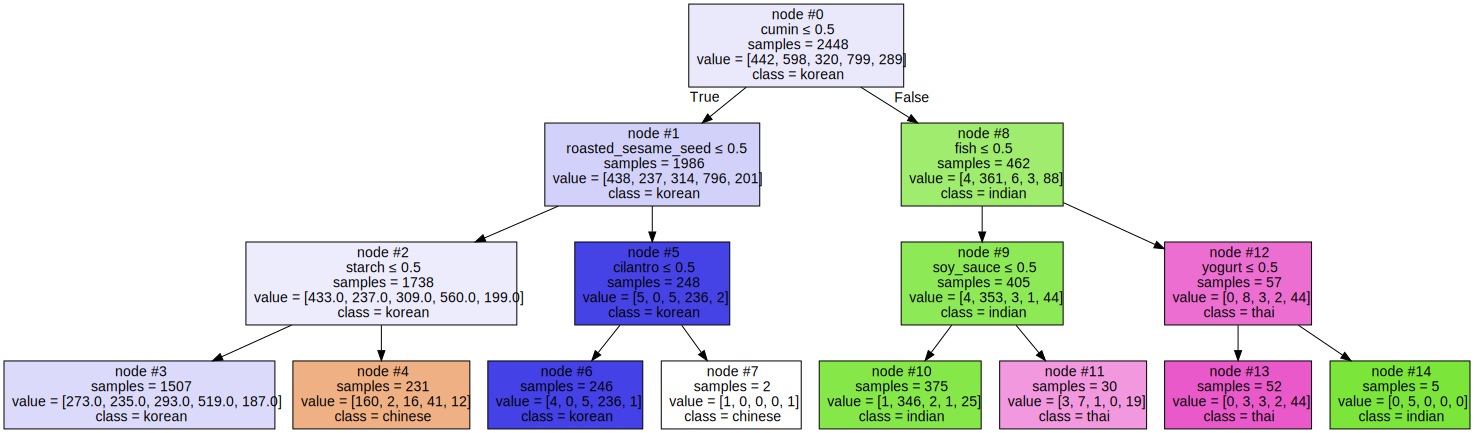

In [86]:
export_graphviz(bamboo_tree, 
                feature_names = list(ingredients.columns.values),
                out_file = "bamboo_tree.dot",
                class_names = np.unique(cuisines),
                filled = True,
                node_ids = True,
                special_characters = True,
                impurity = False,
                label = "all",
                leaves_parallel = False)

with open("bamboo_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

So, we can see:
* if recipe contains cumin and sesame seed and no starch, then its most likely a chinese dish
* if recipe contains no cumin and fish and soy sauce , then its most likely indian cuisine

## Model Evaluation

Let's analyse asian_indian_recipes

In [99]:
asian_indian_recipes["cuisine"].value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

In [107]:
X = asian_indian_recipes.drop("cuisine", axis = 1)
y = asian_indian_recipes["cuisine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

for depth in range(1, 11):
    dt = tree.DecisionTreeClassifier(max_depth = depth, random_state = 42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    print(f"\nMax depth: {depth}\n")
    print(classification_report(y_test, y_pred))


Max depth: 1

              precision    recall  f1-score   support

     chinese       0.00      0.00      0.00        88
      indian       0.75      0.67      0.71       120
    japanese       0.00      0.00      0.00        64
      korean       0.41      0.99      0.58       160
        thai       0.00      0.00      0.00        58

    accuracy                           0.49       490
   macro avg       0.23      0.33      0.26       490
weighted avg       0.32      0.49      0.36       490


Max depth: 2

              precision    recall  f1-score   support

     chinese       0.00      0.00      0.00        88
      indian       0.80      0.67      0.73       120
    japanese       0.00      0.00      0.00        64
      korean       0.41      0.99      0.58       160
        thai       1.00      0.10      0.19        58

    accuracy                           0.50       490
   macro avg       0.44      0.35      0.30       490
weighted avg       0.45      0.50      0.39    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa


Max depth: 5

              precision    recall  f1-score   support

     chinese       0.65      0.34      0.45        88
      indian       0.86      0.68      0.76       120
    japanese       0.00      0.00      0.00        64
      korean       0.46      0.93      0.62       160
        thai       0.87      0.45      0.59        58

    accuracy                           0.58       490
   macro avg       0.57      0.48      0.48       490
weighted avg       0.58      0.58      0.54       490


Max depth: 6

              precision    recall  f1-score   support

     chinese       0.63      0.33      0.43        88
      indian       0.57      0.98      0.72       120
    japanese       0.37      0.55      0.44        64
      korean       0.76      0.54      0.64       160
        thai       0.86      0.41      0.56        58

    accuracy                           0.60       490
   macro avg       0.64      0.56      0.56       490
weighted avg       0.65      0.60      0.59    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Max depth: 8

              precision    recall  f1-score   support

     chinese       0.60      0.42      0.49        88
      indian       0.89      0.76      0.82       120
    japanese       0.49      0.64      0.56        64
      korean       0.60      0.79      0.68       160
        thai       0.78      0.43      0.56        58

    accuracy                           0.65       490
   macro avg       0.67      0.61      0.62       490
weighted avg       0.68      0.65      0.65       490


Max depth: 9

              precision    recall  f1-score   support

     chinese       0.51      0.55      0.53        88
      indian       0.91      0.82      0.86       120
    japanese       0.57      0.52      0.54        64
      korean       0.64      0.77      0.70       160
        thai       0.81      0.50      0.62        58

    accuracy                           0.68       490
   macro avg       0.69      0.63      0.65       490
weighted avg       0.69      0.68      0.68    

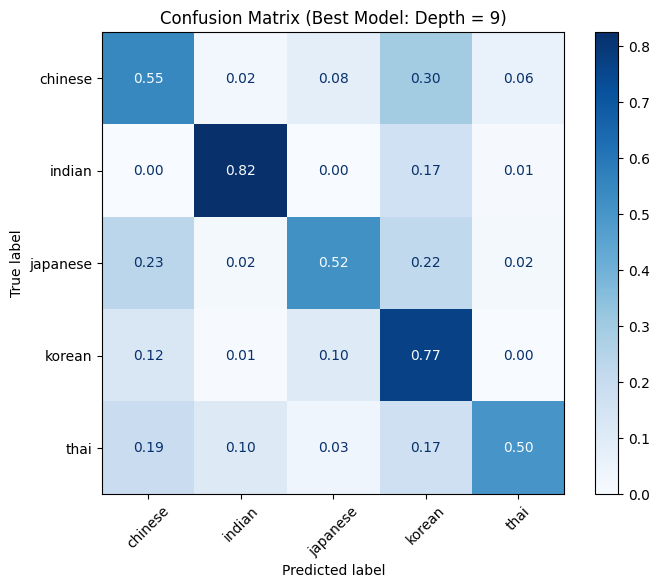

In [119]:
# Train best model
best_depth = 9
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)

# Predict
y_pred = best_model.predict(X_test)

# Get unique class labels
labels = np.unique(y_test)

# Create confusion matrix (normalized by true rows)
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format=".2f")
plt.title(f"Confusion Matrix (Best Model: Depth = {best_depth})")
plt.xticks(rotation=45)
plt.show()


## Conclusion

In this project, we successfully built an end-to-end data science pipeline to predict the cuisine of a recipe based solely on its ingredients. After thorough data cleaning and exploration, we focused on five popular Asian cuisines: Chinese, Indian, Japanese, Korean, and Thai.

We evaluated Decision Tree models with different maximum depths (from 1 to 10) and found that a depth of **9** achieved the best overall performance. Our final model showed strong classification results for Indian (82% recall) and Korean (77% recall) cuisines, while performance was moderate for Chinese (55% recall), Japanese (52% recall), and Thai (50% recall). 

These results highlight that certain cuisines have more distinctive ingredient patterns, while others overlap more (e.g., Chinese and Japanese), making them harder to distinguish.


## References

- Ahn, Yong-Yeol et al. (2011). "Flavor network and the principles of food pairing." *Scientific Reports*. [Link](https://www.nature.com/articles/srep00196)
- IBM Skills Network. (n.d.). *Data Science Professional Certificate Labs and Datasets*. Available at: [IBM Developer Skills Network](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv)
- This project is inspired by labs from the IBM Data Science Professional Certificate coursework.